<a href="https://colab.research.google.com/github/Suman-Adhikary/Big-Mart-Sale-Prediction/blob/main/Bigmart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from prettytable import PrettyTable
%matplotlib inline
sns.set_style('darkgrid')

# Import dataset.

In [160]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [161]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [162]:
train_data.shape

(8523, 12)

In [163]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [164]:
test_data.shape

(5681, 11)

## Combine train, test data and separate target variable.

In [165]:
X = pd.concat([train_data.iloc[:, :-1], test_data], axis=0) 
y = train_data.iloc[:, -1]
X = X.drop(['Item_Identifier'], axis=1) #Remove Item_Identifier column.

In [166]:
X.shape, y.shape

((14204, 10), (8523,))

In [167]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [168]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Data information.

In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                11765 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                10188 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.2+ MB


### Distribution of target variable.

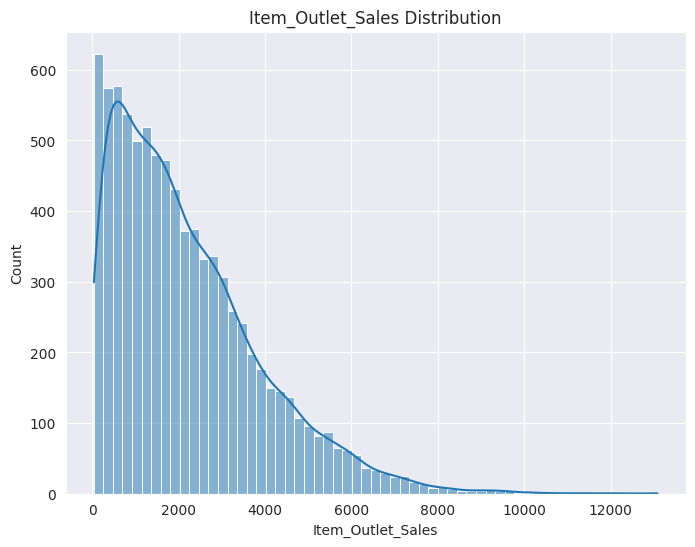

In [170]:
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True)
title = plt.title("Item_Outlet_Sales Distribution")

In [171]:
print('Skewness of y : ', y.skew())
print('Kurtosis of y : ', y.kurt())

Skewness of y :  1.1775306028542796
Kurtosis of y :  1.6158766814287264


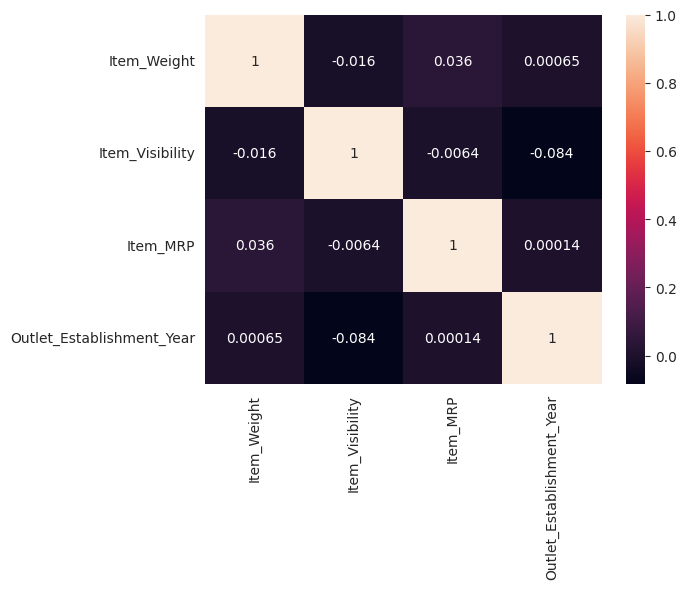

In [172]:
matrix = X.corr()
sns.heatmap(matrix, annot=True)
plt.show()

# Univariate analysis.

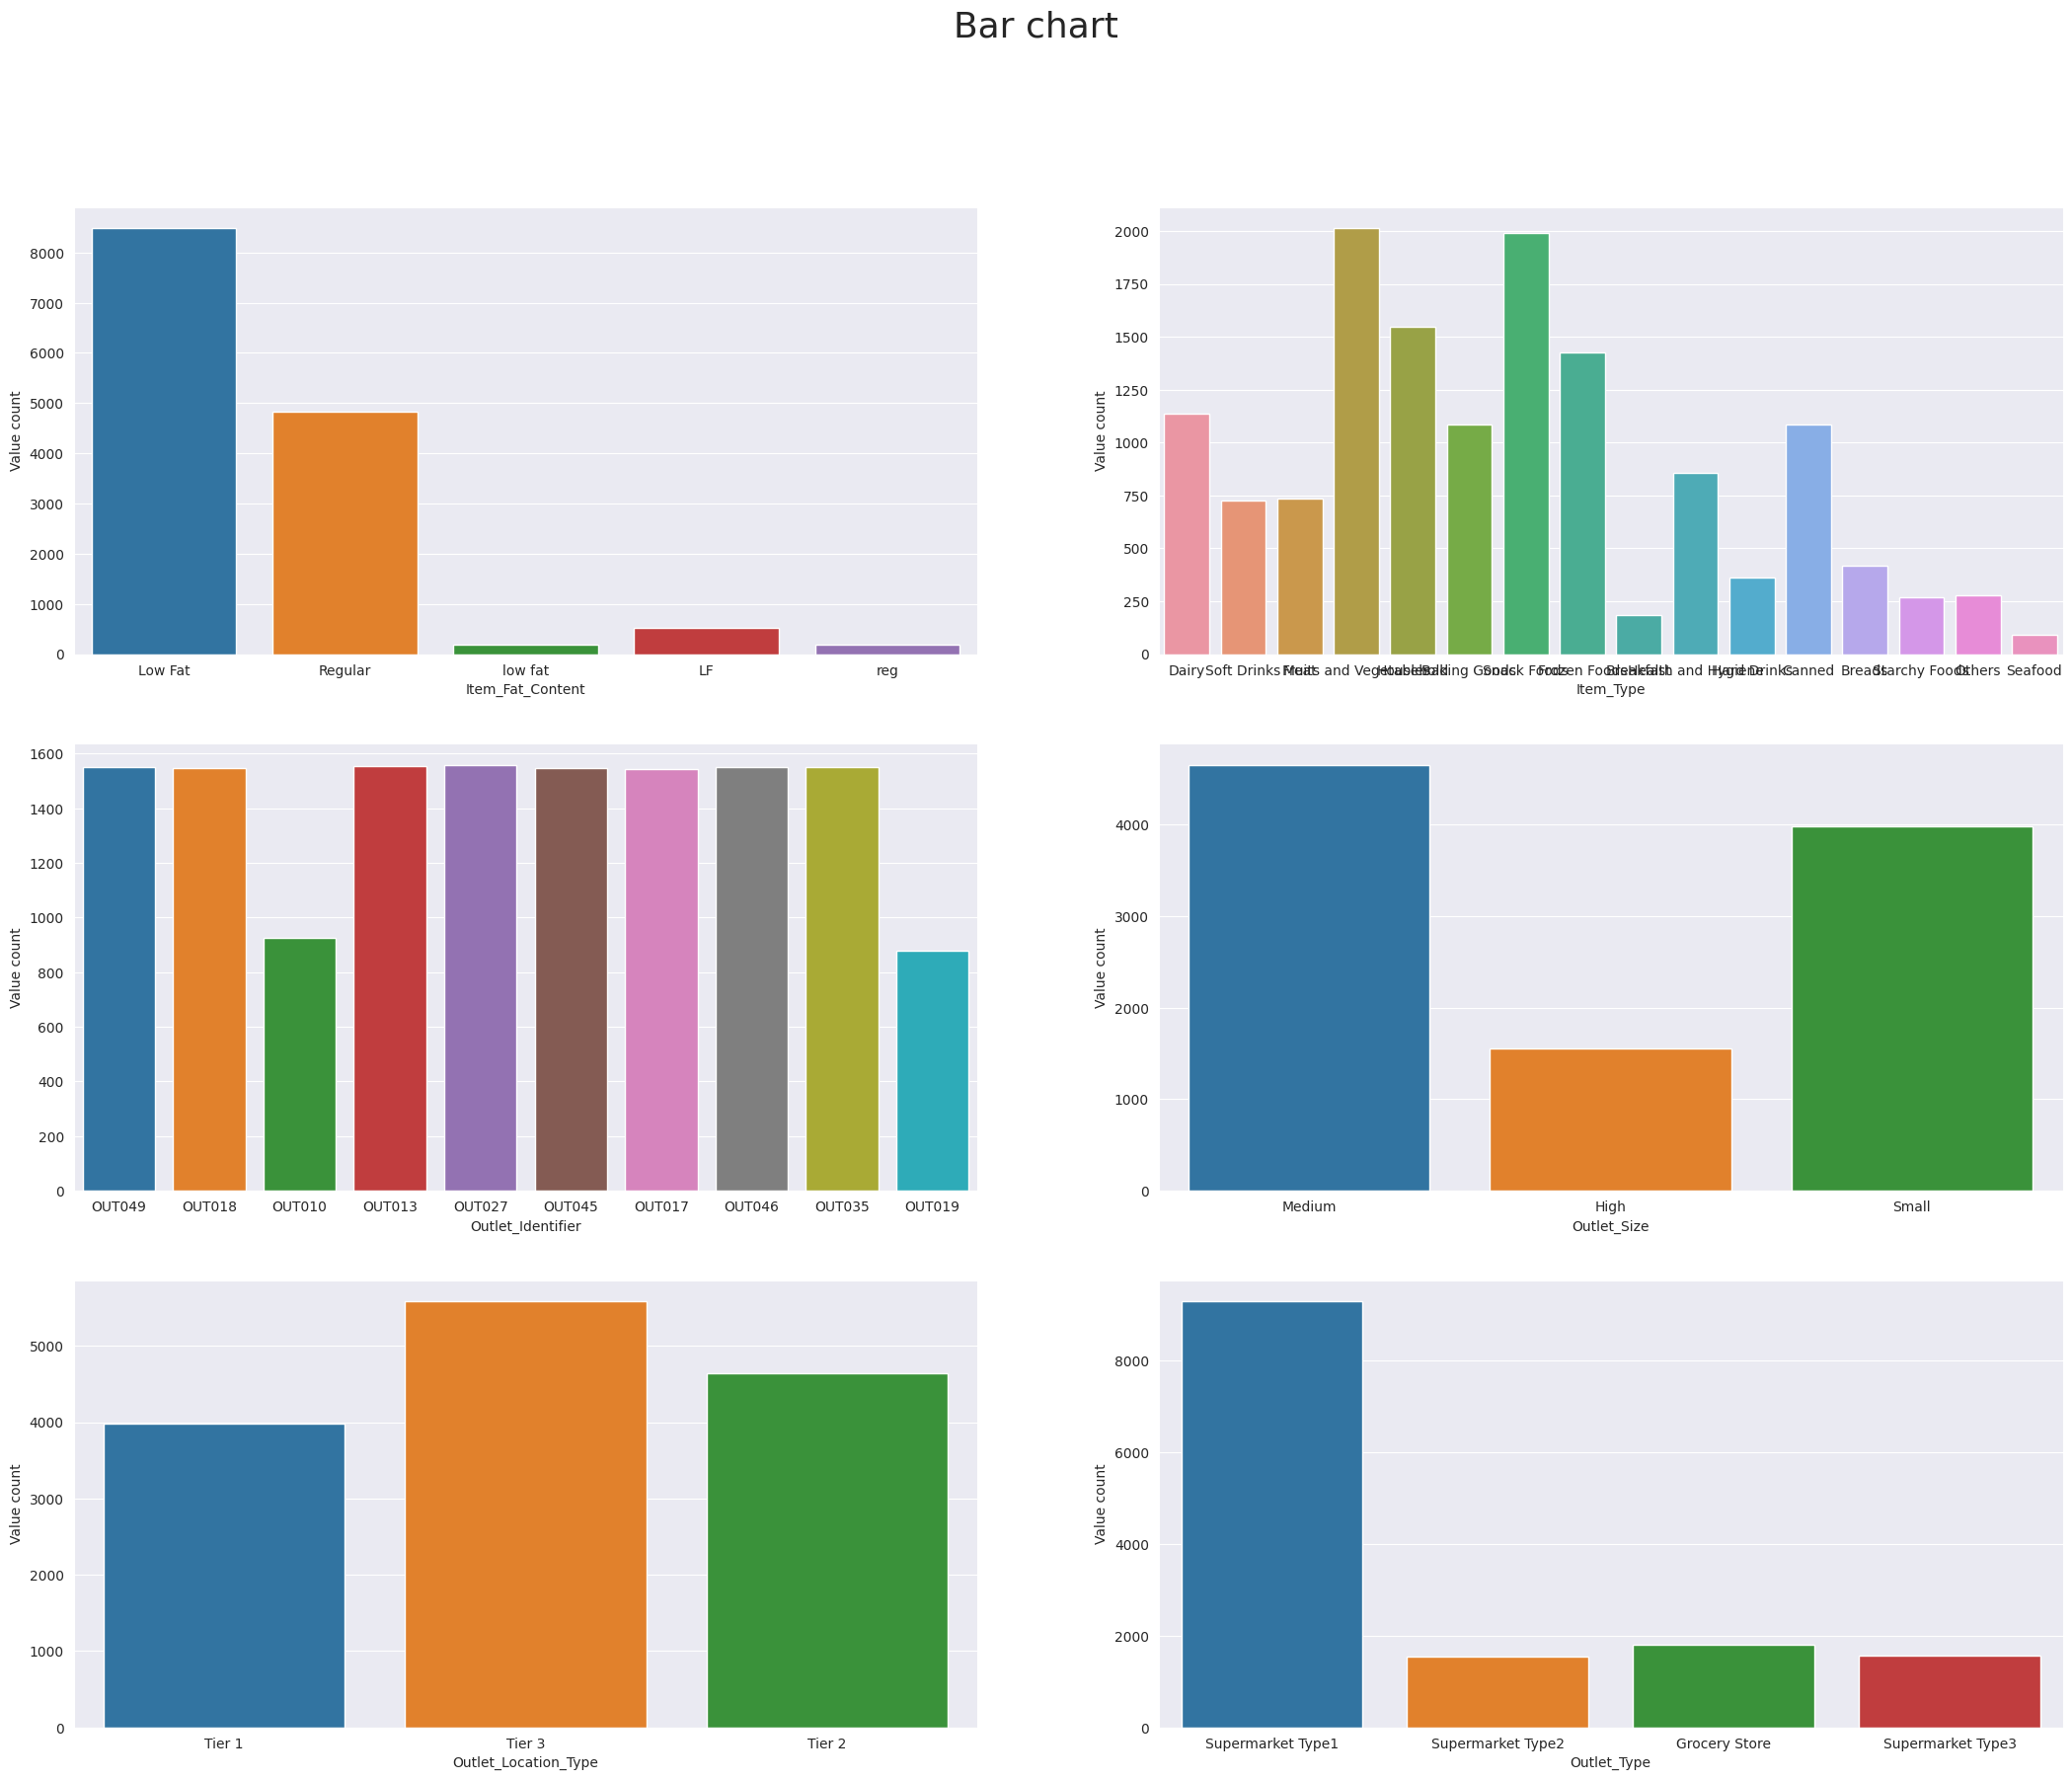

In [173]:
Unique = [X[col].nunique() for col in X.columns if X[col].dtypes == 'object']
col = [col for col in X.columns if X[col].dtypes == 'object']

fig, axs = plt.subplots(3, 2, figsize=(26, 20), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = X, x = X[col[i]], ax=Axis[i])
    Axis[i].set_ylabel('Value count')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Bar chart", fontsize=26)
plt.show()

# Missing value.

In [174]:
col = [col for col in X.columns if X[col].isna().sum() > 0]
datatype = [X[col].dtypes for col in X.columns if X[col].isna().sum() > 0]
missing = [X[col].isna().sum() for col in X.columns if X[col].isna().sum() > 0]
percentage_mis = [round(X[col].isna().sum() / len(X[col]) * 100, 2) for col in X.columns if X[col].isna().sum() > 0]

In [175]:
Missing_Table = PrettyTable()
Missing_Table.add_column('Column', col)
Missing_Table.add_column('Data Type', datatype)
Missing_Table.add_column('No of Missing', missing)
Missing_Table.add_column('% of missing', percentage_mis)
print(Missing_Table)

+-------------+-----------+---------------+--------------+
|    Column   | Data Type | No of Missing | % of missing |
+-------------+-----------+---------------+--------------+
| Item_Weight |  float64  |      2439     |    17.17     |
| Outlet_Size |   object  |      4016     |    28.27     |
+-------------+-----------+---------------+--------------+


# No of unique categorical.

In [176]:
col = [col for col in X.columns if X[col].dtypes == 'object']
Unique_table = PrettyTable()
Unique_table.add_column('Column', col)
Unique_table.add_column('No of unique values', Unique)
print(Unique_table)

+----------------------+---------------------+
|        Column        | No of unique values |
+----------------------+---------------------+
|   Item_Fat_Content   |          5          |
|      Item_Type       |          16         |
|  Outlet_Identifier   |          10         |
|     Outlet_Size      |          3          |
| Outlet_Location_Type |          3          |
|     Outlet_Type      |          4          |
+----------------------+---------------------+
